In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
trdata=pd.read_csv('train.csv')
ttdata=pd.read_csv('test.csv')
#combined the train and test data
Final_data=pd.concat([trdata, ttdata],axis=0,sort=False)

In [3]:
trdata.shape

(1460, 81)

In [4]:
ttdata.shape

(1459, 80)

In [5]:
Final_data.shape

(2919, 81)

In [6]:
Final_data.isnull().sum().sort_values()

Id                  0
Foundation          0
Heating             0
SaleCondition       0
CentralAir          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
FullBath            0
HalfBath            0
BedroomAbvGr        0
ExterCond           0
KitchenAbvGr        0
Fireplaces          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
TotRmsAbvGrd        0
ExterQual           0
HeatingQC           0
Neighborhood        0
LotConfig           0
                 ... 
BsmtUnfSF           1
GarageCars          1
TotalBsmtSF         1
Exterior1st         1
BsmtFinSF2          1
GarageArea          1
BsmtHalfBath        2
BsmtFullBath        2
Functional          2
Utilities           2
MSZoning            4
MasVnrArea         23
MasVnrType         24
BsmtFinType1       79
BsmtFinTyp

In [7]:
miss_values=Final_data.isnull().sum()
miss_values
miss_cnt=miss_values[miss_values>0]
miss_cnt.sort_values()
#print(len(miss_cnt))


Electrical         1
GarageArea         1
GarageCars         1
Exterior1st        1
Exterior2nd        1
KitchenQual        1
SaleType           1
TotalBsmtSF        1
BsmtFinSF1         1
BsmtUnfSF          1
BsmtFinSF2         1
Utilities          2
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
MSZoning           4
MasVnrArea        23
MasVnrType        24
BsmtFinType1      79
BsmtFinType2      80
BsmtQual          81
BsmtExposure      82
BsmtCond          82
GarageType       157
GarageCond       159
GarageQual       159
GarageFinish     159
GarageYrBlt      159
LotFrontage      486
FireplaceQu     1420
SalePrice       1459
Fence           2348
Alley           2721
MiscFeature     2814
PoolQC          2909
dtype: int64

In [8]:
Final_data.shape

(2919, 81)

In [9]:
#drop the columns 
Final_data.drop(['PoolQC'],axis=1, inplace=True)
Final_data.drop(['Fence'],axis=1, inplace=True)
Final_data.drop(['Alley'],axis=1, inplace=True)
Final_data.drop(['MiscFeature'],axis=1, inplace=True)
Final_data.drop(['FireplaceQu'],axis=1, inplace=True)


In [10]:
miss_values=Final_data.isnull().sum()
miss_values
miss_cnt=miss_values[miss_values>0]
miss_cnt.sort_values()
#print(len(miss_cnt))


BsmtUnfSF          1
GarageArea         1
Exterior1st        1
Exterior2nd        1
GarageCars         1
KitchenQual        1
Electrical         1
BsmtFinSF1         1
TotalBsmtSF        1
BsmtFinSF2         1
SaleType           1
Utilities          2
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
MSZoning           4
MasVnrArea        23
MasVnrType        24
BsmtFinType1      79
BsmtFinType2      80
BsmtQual          81
BsmtExposure      82
BsmtCond          82
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageCond       159
LotFrontage      486
SalePrice       1459
dtype: int64

In [11]:
#drop the columns 
trdata.drop(['PoolQC'],axis=1, inplace=True)
trdata.drop(['Fence'],axis=1, inplace=True)
trdata.drop(['Alley'],axis=1, inplace=True)
trdata.drop(['MiscFeature'],axis=1, inplace=True)
trdata.drop(['FireplaceQu'],axis=1, inplace=True)


In [12]:
trdata.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

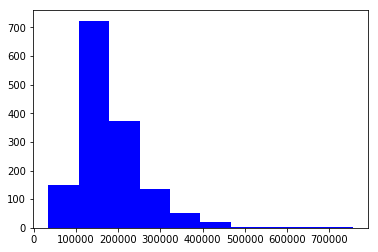

In [13]:
trdata.SalePrice.skew()
plt.hist(trdata.SalePrice, color='blue')
plt.show()

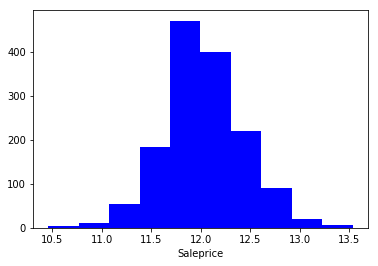

In [14]:
#to normalize the SalePrice distribution
target=np.log(trdata.SalePrice)
target.skew()
plt.hist(target, color='blue')
plt.xlabel('Saleprice')
plt.show()

In [15]:
numeric_feature=trdata.select_dtypes(include=[np.number])
corr=numeric_feature.corr()

In [16]:
#most positively corelated 5 features with saleprice
print(corr['SalePrice'].sort_values(ascending=False)[:5],'\n')
#most Negatively corelated 5 features with saleprice
print(corr['SalePrice'].sort_values(ascending=False)[-5:],'\n')

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64 



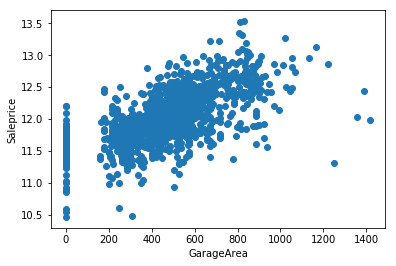

In [17]:
plt.scatter(x=trdata['GarageArea'],y=target)
plt.xlabel('GarageArea')
plt.ylabel('Saleprice')
plt.show()

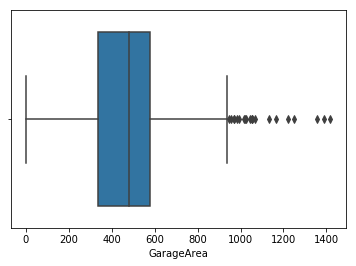

In [18]:
sns.boxplot(x=trdata['GarageArea'])

In [19]:
trdata['SalePrice'].max()

755000

In [20]:
trdata.SalePrice.min()

34900

In [21]:
trdata.SalePrice.mean()

180921.19589041095

In [22]:
trdata[trdata['SalePrice'] >50000].count()

Id               1455
MSSubClass       1455
MSZoning         1455
LotFrontage      1196
LotArea          1455
Street           1455
LotShape         1455
LandContour      1455
Utilities        1455
LotConfig        1455
LandSlope        1455
Neighborhood     1455
Condition1       1455
Condition2       1455
BldgType         1455
HouseStyle       1455
OverallQual      1455
OverallCond      1455
YearBuilt        1455
YearRemodAdd     1455
RoofStyle        1455
RoofMatl         1455
Exterior1st      1455
Exterior2nd      1455
MasVnrType       1447
MasVnrArea       1447
ExterQual        1455
ExterCond        1455
Foundation       1455
BsmtQual         1419
                 ... 
BsmtFullBath     1455
BsmtHalfBath     1455
FullBath         1455
HalfBath         1455
BedroomAbvGr     1455
KitchenAbvGr     1455
KitchenQual      1455
TotRmsAbvGrd     1455
Functional       1455
Fireplaces       1455
GarageType       1377
GarageYrBlt      1377
GarageFinish     1377
GarageCars       1455
GarageArea

In [23]:
#find numerical value from training data
num_data=Final_data.select_dtypes(include=[np.number])
print("Numeric data")
num_data.shape


Numeric data


(2919, 38)

In [24]:
#find categorical values from training data
cat_data=Final_data.select_dtypes(exclude=[np.number])
print("Categorical data")
print(cat_data.shape)
print("Numerical data")
print(num_data.shape)
print(Final_data.shape)


Categorical data
(2919, 38)
Numerical data
(2919, 38)
(2919, 76)


C:\Users\Shailendra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Shailendra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Shailendra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Shailendra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Shailendra\Anaconda3\lib\site-packages\

C:\Users\Shailendra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Shailendra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Shailendra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


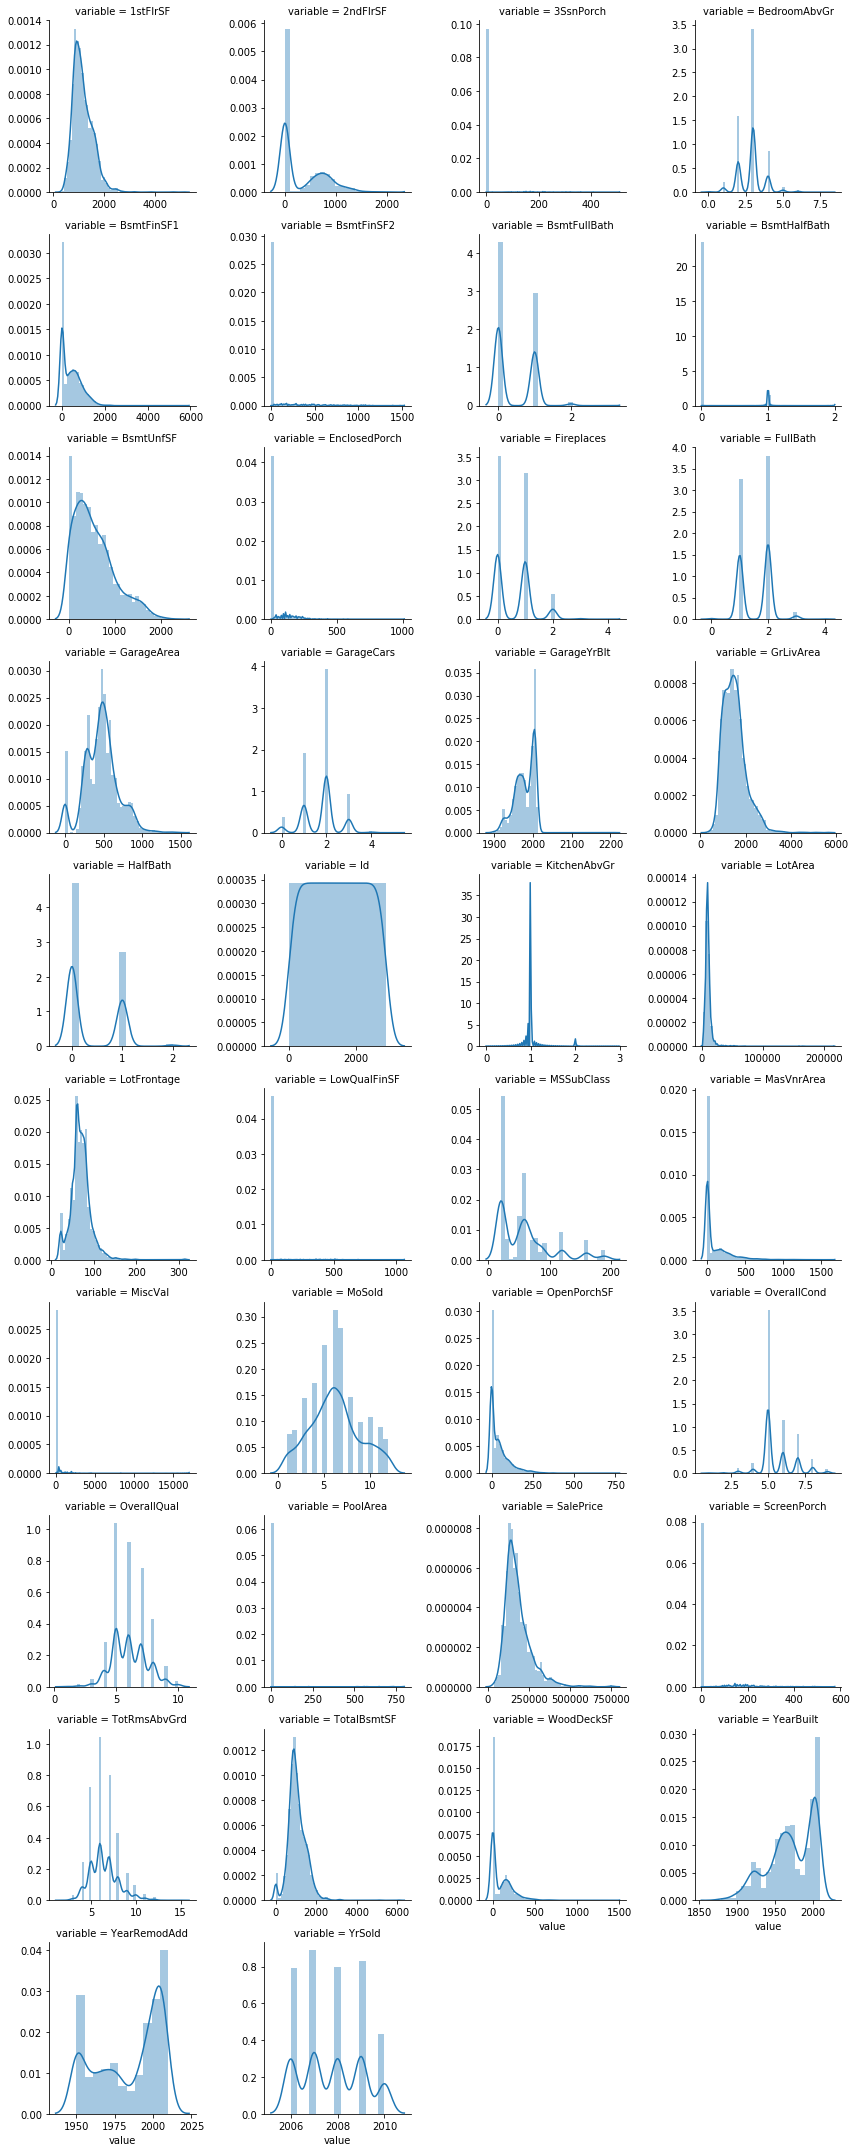

In [25]:
f=pd.melt(Final_data, value_vars=sorted(num_data))
g=sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g=g.map(sns.distplot, 'value')

C:\Users\Shailendra\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


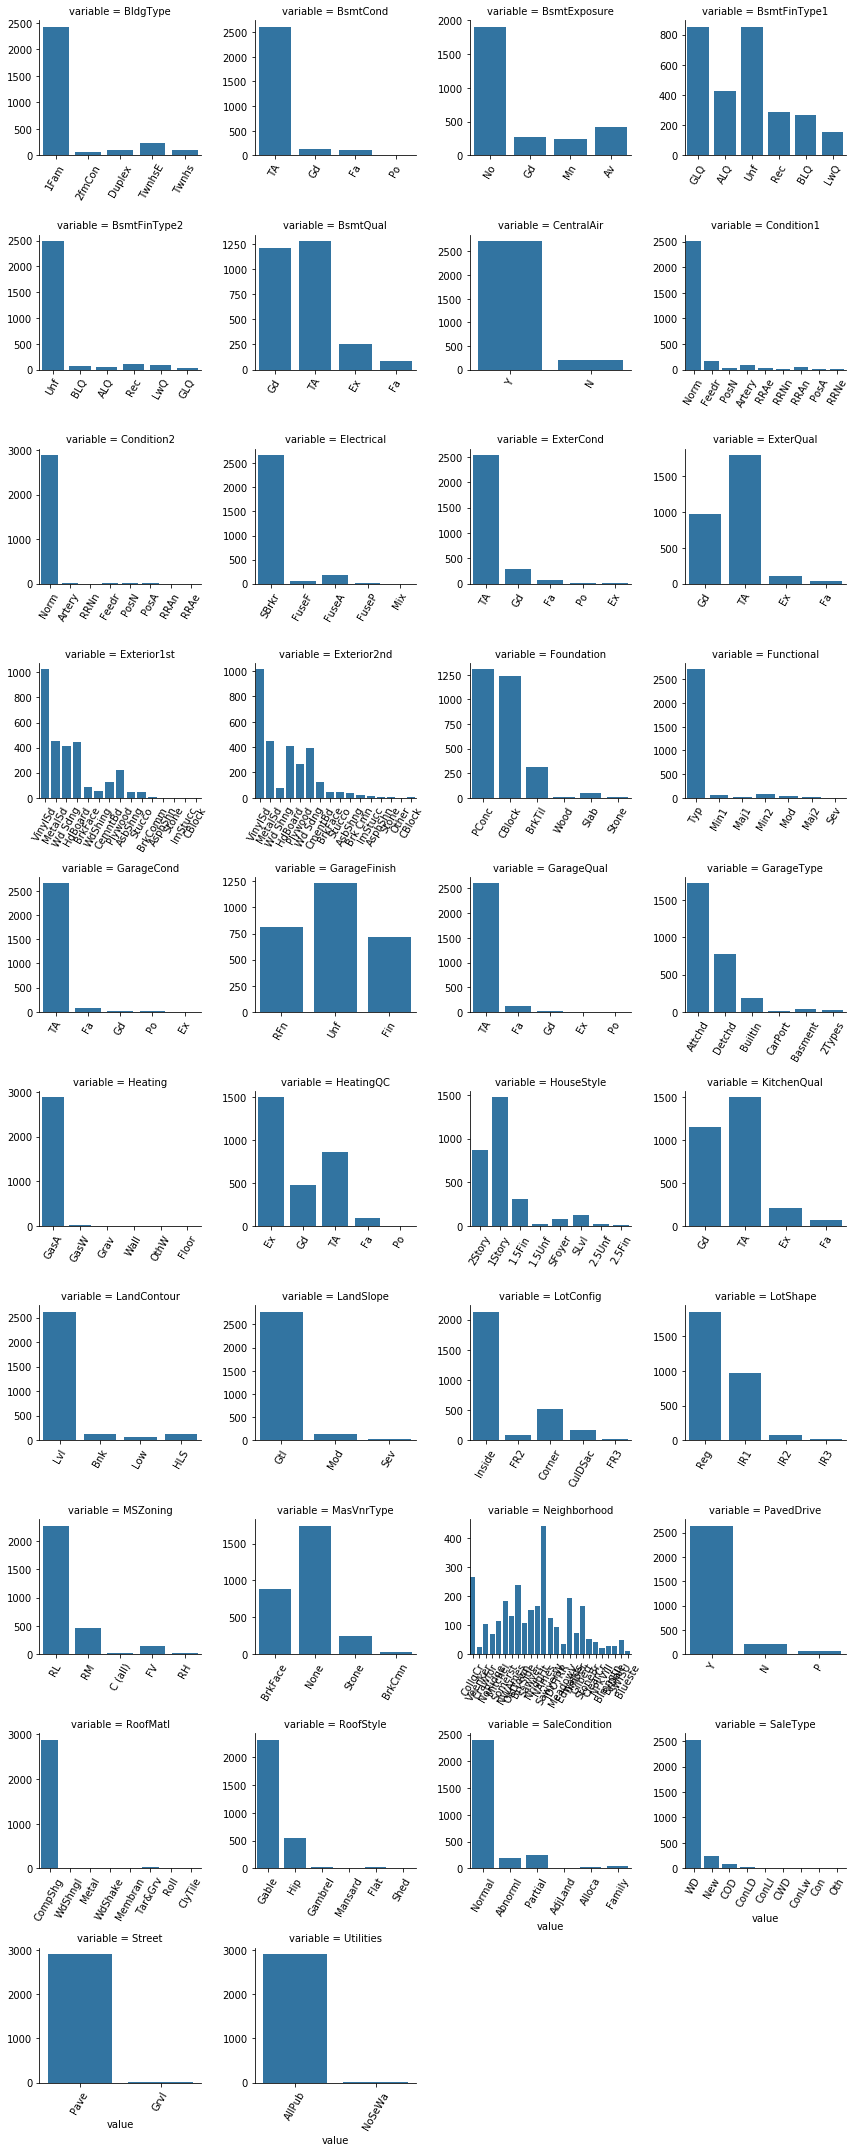

In [26]:
#Graphical representation of categorical features/variables
f=pd.melt(Final_data, value_vars= sorted(cat_data))
g=sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g=g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(),rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

In [27]:
# conversion of numerical data (which work as categorical) to categorical data
trdata['YrSold']=trdata.YrSold.apply(lambda x:str(x))
trdata['MoSold']=trdata.MoSold.apply(lambda x:str(x))
trdata['MSSubClass']=trdata.MSSubClass.apply(lambda x:str(x))


In [28]:
# conversion of numerical data (which work as categorical) to categorical data
Final_data['YrSold']=Final_data.YrSold.apply(lambda x:str(x))
Final_data['MoSold']=Final_data.MoSold.apply(lambda x:str(x))
Final_data['MSSubClass']=Final_data.MSSubClass.apply(lambda x:str(x))
Final_data.YrSold.value_counts()

2007    692
2009    647
2008    622
2006    619
2010    339
Name: YrSold, dtype: int64

In [29]:
trdata.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [30]:
# to convert categorical to numerical-- Street
trdata.Street.replace({'Pave':1,'Grvl':2}, inplace=True)

In [31]:
Final_data.Street.unique()
# to convert categorical to numerical-- Street
Final_data.Street.replace({'Pave':1,'Grvl':2}, inplace=True)

In [32]:
#used to handle outlier by removing the rows which are having outlier by creating new dataset trdata1
trdata1=trdata[trdata['GarageArea']<1200]

In [33]:
Final_data['LotFrontage']=Final_data['LotFrontage'].fillna(Final_data['LotFrontage'].mean())
Final_data['MasVnrType']=Final_data['MasVnrType'].fillna(Final_data['MasVnrType'].mode()[0])
Final_data['MasVnrArea']=Final_data['MasVnrArea'].fillna(Final_data['MasVnrArea'].mean())
Final_data['BsmtQual']=Final_data['BsmtQual'].fillna(Final_data['BsmtQual'].mode()[0])
Final_data['BsmtCond']=Final_data['BsmtCond'].fillna(Final_data['BsmtCond'].mode()[0])
Final_data['BsmtExposure']=Final_data['BsmtExposure'].fillna(Final_data['BsmtExposure'].mode()[0])
Final_data['BsmtFinType1']=Final_data['BsmtFinType1'].fillna(Final_data['BsmtFinType1'].mode()[0])
Final_data['BsmtFinType2']=Final_data['BsmtFinType2'].fillna(Final_data['BsmtFinType2'].mode()[0])
Final_data['Electrical']=Final_data['Electrical'].fillna(Final_data['Electrical'].mode()[0])
#trdata.drop(['FireplaceQu'], axis=1, inplace=True)
Final_data['GarageType']=Final_data['GarageType'].fillna(Final_data['GarageType'].mode()[0])
Final_data['GarageFinish']=Final_data['GarageFinish'].fillna(Final_data['GarageFinish'].mode()[0])
Final_data['GarageQual']=Final_data['GarageQual'].fillna(Final_data['GarageQual'].mode()[0])
Final_data['GarageCond']=Final_data['GarageCond'].fillna(Final_data['GarageCond'].mode()[0])

In [34]:
cat_data.describe()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,2915,2919,2919,2919,2917,2919,2919,2919,2919,2919,...,2918,2918,2917,2762,2760,2760,2760,2919,2918,2919
unique,5,2,4,4,2,5,3,25,9,8,...,5,4,7,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,2265,2907,1859,2622,2916,2133,2778,443,2511,2889,...,2671,1492,2717,1723,1230,2604,2654,2641,2525,2402


In [35]:
miss_values=Final_data.isnull().sum()
miss_values
miss_cnt=miss_values[miss_values>0]
miss_cnt.sort_values()
#print(len(miss_cnt))


Exterior1st        1
Exterior2nd        1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
SaleType           1
KitchenQual        1
GarageArea         1
GarageCars         1
BsmtFullBath       2
Utilities          2
BsmtHalfBath       2
Functional         2
MSZoning           4
GarageYrBlt      159
SalePrice       1459
dtype: int64

In [36]:
trdata.SaleCondition.unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

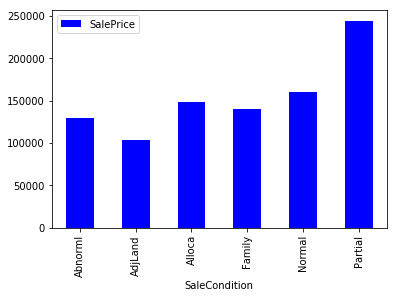

In [37]:
condition_pivot=trdata.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel=('sale condition')
plt.ylabel=('median sale price')
plt.show()

In [38]:
def encode(x): return 1 if x=='Partial' else 0

In [39]:
trdata['SaleCondition']=trdata.SaleCondition.apply(encode)
ttdata['SaleCondition']=trdata.SaleCondition.apply(encode)
Final_data['SaleCondition']=trdata.SaleCondition.apply(encode)



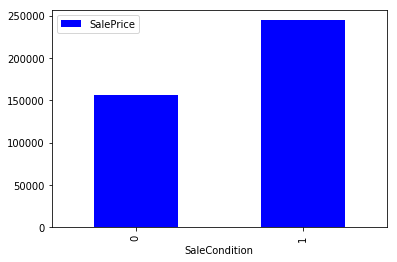

In [40]:
#After encoding function
condition_pivot=trdata.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel=('sale condition')
plt.ylabel=('median sale price')
plt.show()

In [41]:
Final_data['SaleCondition']=Final_data.SaleCondition.apply(encode)

In [42]:
Final_data.SaleCondition.value_counts()

0    2919
Name: SaleCondition, dtype: int64

In [43]:
Final_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,1,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,0,208500.0
1,2,20,RL,80.0,9600,1,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,0,181500.0
2,3,60,RL,68.0,11250,1,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,0,223500.0
3,4,70,RL,60.0,9550,1,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,0,140000.0
4,5,60,RL,84.0,14260,1,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,0,250000.0


In [44]:
trdata.SaleCondition.unique()

array([0, 1], dtype=int64)

In [45]:
#find numerical value from training data
num_data=Final_data.select_dtypes(include=[np.number])
print("Numeric data")
print(num_data.shape)
Final_data.shape


Numeric data
(2919, 37)


(2919, 76)

In [46]:
#now use one hot method to convert all categorical values to numerical

In [67]:
cat_data=Final_data.select_dtypes(exclude=[np.number])
print("Categorical data")
print(cat_data.shape)


Categorical data
(2919, 39)


In [48]:
Final_data.shape

(2919, 76)

In [93]:
miss_values=Final_data.isnull().sum()
miss_values
miss_cnt=miss_values[miss_values>0]
miss_cnt.sort_values()
#print(len(miss_cnt))


SalePrice    1459
dtype: int64

In [94]:
Final_data.TotalBsmtSF.unique()

array([ 856., 1262.,  920., ...,  498.,  432., 1381.])

In [92]:
Final_data['TotalBsmtSF']=Final_data['TotalBsmtSF'].fillna(Final_data['TotalBsmtSF'].mean())
trdata['TotalBsmtSF']=trdata['TotalBsmtSF'].fillna(trdata['TotalBsmtSF'].mean())

In [52]:
Final_data['MSZoning']=Final_data['MSZoning'].fillna(Final_data['MSZoning'].mode()[0])
trdata['MSZoning']=trdata['MSZoning'].fillna(trdata['MSZoning'].mode()[0])
Final_data['Functional']=Final_data['Functional'].fillna(Final_data['Functional'].mode()[0])
trdata['Functional']=trdata['Functional'].fillna(trdata['Functional'].mode()[0])
Final_data['Utilities']=Final_data['Utilities'].fillna(Final_data['Utilities'].mode()[0])
trdata['Utilities']=trdata['Utilities'].fillna(trdata['Utilities'].mode()[0])
Final_data['SaleType']=Final_data['SaleType'].fillna(Final_data['SaleType'].mode()[0])
trdata['SaleType']=trdata['SaleType'].fillna(trdata['SaleType'].mode()[0])
trdata['GarageArea']=trdata['GarageArea'].fillna(trdata['GarageArea'].mean())
Final_data['GarageArea']=Final_data['GarageArea'].fillna(Final_data['GarageArea'].mean())
trdata['GarageCars']=trdata['GarageCars'].fillna(trdata['GarageCars'].mean())
Final_data['GarageCars']=Final_data['GarageCars'].fillna(Final_data['GarageCars'].mean())
trdata['BsmtFinSF1']=trdata['BsmtFinSF1'].fillna(trdata['BsmtFinSF1'].mode()[0])
Final_data['BsmtFinSF1']=Final_data['BsmtFinSF1'].fillna(Final_data['BsmtFinSF1'].mode()[0])
trdata['BsmtFinSF2']=trdata['BsmtFinSF2'].fillna(trdata['BsmtFinSF2'].mode()[0])
Final_data['BsmtFinSF2']=Final_data['BsmtFinSF2'].fillna(Final_data['BsmtFinSF2'].mode()[0])
trdata['BsmtFullBath']=trdata['BsmtFullBath'].fillna(trdata['BsmtFullBath'].mean())
Final_data['BsmtFullBath']=Final_data['BsmtFullBath'].fillna(Final_data['BsmtFullBath'].mean())
trdata['BsmtHalfBath']=trdata['BsmtHalfBath'].fillna(trdata['BsmtHalfBath'].mean())
Final_data['BsmtHalfBath']=Final_data['BsmtHalfBath'].fillna(Final_data['BsmtHalfBath'].mean())
Final_data['KitchenQual']=Final_data['KitchenQual'].fillna(Final_data['KitchenQual'].mode()[0])
trdata['KitchenQual']=trdata['KitchenQual'].fillna(trdata['KitchenQual'].mode()[0])
Final_data['Exterior1st']=Final_data['Exterior1st'].fillna(Final_data['Exterior1st'].mode()[0])
trdata['Exterior1st']=trdata['Exterior1st'].fillna(trdata['Exterior1st'].mode()[0])
Final_data['Exterior2nd']=Final_data['Exterior2nd'].fillna(Final_data['Exterior2nd'].mode()[0])
trdata['Exterior2nd']=trdata['Exterior2nd'].fillna(trdata['Exterior2nd'].mode()[0])
Final_data['BsmtUnfSF']=Final_data['BsmtUnfSF'].fillna(Final_data['BsmtUnfSF'].mode()[0])
trdata['BsmtUnfSF']=trdata['BsmtUnfSF'].fillna(trdata['BsmtUnfSF'].mode()[0])

Final_data['TotalBsmtSF']=Final_data['TotalBsmtSF'].fillna(Final_data['TotalBsmtSF'].mean())
trdata['TotalBsmtSF']=trdata['TotalBsmtSF'].fillna(trdata['TotalBsmtSF'].mean())

In [53]:
# to drop GarageYrBlt column
trdata.drop(['GarageYrBlt'],axis=1, inplace=True)
Final_data.drop(['GarageYrBlt'],axis=1, inplace=True)
ttdata.drop(['GarageYrBlt'],axis=1, inplace=True)

In [54]:
# to drop Id column
trdata.drop(['Id'],axis=1, inplace=True)
ttdata.drop(['Id'],axis=1, inplace=True)
Final_data.drop(['Id'],axis=1, inplace=True)

In [55]:
cat_data.describe()

,MSSubClass,MSZoning,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType
count,2919,2915,2919,2919,2917,2919,2919,2919,2919,2919,...,2918,2917,2919,2919,2919,2919,2919,2919,2919,2918
unique,16,5,4,4,2,5,3,25,9,8,...,4,7,6,3,5,5,3,12,5,9
top,20,RL,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,TA,Typ,Attchd,Unf,TA,TA,Y,6,2007,WD
freq,1079,2265,1859,2622,2916,2133,2778,443,2511,2889,...,1492,2717,1880,1389,2763,2813,2641,503,692,2525


In [95]:
len(cat_data.columns)

39

In [98]:
cat_data=trdata.select_dtypes(exclude=[np.number])
cat_col=cat_data.columns

In [99]:
def onehotdummy_fun(mcolumns):
    df_final=Final_data
    i=0
    for fields in mcolumns:
        print(fields)
        df=pd.get_dummies(Final_data[fields], drop_first=True)
        Final_data.drop([fields],axis=1, inplace=True)
        
        if i==0:
            df_final=df.copy()
        else:
            df_final=pd.concat([df_final,df],axis=1)
        i=i+1
    df_final=pd.concat([Final_data,df_final],axis=1)
    return df_final
        

In [100]:
final_df=onehotdummy_fun(cat_col)

MSSubClass
MSZoning
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
MoSold
YrSold
SaleType


In [101]:
final_df.shape

(2919, 256)

In [102]:
final_df=final_df.loc[:,~final_df.columns.duplicated()]

In [103]:
final_df.shape

(2919, 200)

In [104]:
final_df.head()

,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,2009,2010,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD
0,65.0,8450,1,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,80.0,9600,1,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,68.0,11250,1,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,60.0,9550,1,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,84.0,14260,1,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [105]:
df_train=final_df.iloc[:1460,:]
df_test=final_df.iloc[1460:, :]

In [109]:
df_test.drop(['SalePrice'],axis=1, inplace=True)

In [108]:
df_train.shape

(1460, 200)

In [110]:
df_test.shape

(1459, 199)

In [111]:
x_train=df_train.drop(['SalePrice'],axis=1)
y_train=df_train['SalePrice']

In [112]:
import xgboost
classifier=xgboost.XGBRegressor()
classifier.fit(x_train,y_train)

C:\Users\Shailendra\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Shailendra\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[03:41:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [113]:
y_pred=classifier.predict(df_test)
y_pred

array([122990.47, 156796.08, 178695.58, ..., 173463.88, 120793.82,
       241058.69], dtype=float32)

In [114]:
#create sample submission file
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission11.csv',index=False)